# IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [4]:
# read the train_cleaneds
train_source = pd.read_csv('./data/training_set.csv')
test_source = pd.read_csv('./data/testing_set.csv')

In [5]:
# see the size of the train_cleaneds
train_source.shape, test_source.shape

((3509, 8), (1500, 7))

In [6]:
train_source.head()

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1


In [7]:
test_source.head()

,test_idx,Time,Open,High,Low,Close,Volume
0,0,2018-05-29 00:00:00,1.16271,1.16394,1.15099,1.15343,336090
1,1,2018-05-30 00:00:00,1.15342,1.16759,1.15186,1.16627,318421
2,2,2018-05-31 00:00:00,1.16627,1.17243,1.16410,1.16938,285788
3,3,2018-06-01 00:00:00,1.16937,1.17178,1.16170,1.16584,253533
4,4,2018-06-03 00:00:00,1.16561,1.16794,1.16561,1.16757,14803


In [8]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]
    volume = row[6]
    # check if all conditions are true
    if low <= high and low <= open and low <= close and high >= open and high >= close and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid

In [9]:
# create column 'valid' to indicate if the row is valid
train_source['valid'] = train_source.apply(is_valid, axis=1)

In [11]:
# create column outlier to indicate if the row is outlier, we'll consider outlier if it's out of the iqr
train_source['outlier'] = train_source.apply(lambda row: row[2] < row[3] - 1.5 * (row[3] - row[4]) or row[2] > row[4] + 1.5 * (row[3] - row[4]), axis=1)

In [29]:
train_source[(train_source['valid'] == False) & (train_source['outlier'] == True)]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,outlier
20,20,2007-03-30 00:00:00,9.326730,1.339850,1.32880,1.33535,881928.0,0,False,True
26,26,2007-04-06 00:00:00,1.342200,1.342680,6.68200,1.33780,393636.0,1,False,True
105,105,2007-07-08 00:00:00,8.179140,1.363370,1.36206,1.36235,57967.0,1,False,True
117,117,2007-07-22 00:00:00,0.172918,1.384380,1.38250,1.38366,267895.0,0,False,True
440,440,2008-08-01 00:00:00,0.194550,1.558860,1.55142,NaN,769017.0,0,False,True
575,575,2009-01-06 00:00:00,1.359100,0.170219,1.33130,1.34785,638062.0,0,False,True
617,617,2009-02-24 00:00:00,10.148400,1.287750,1.26800,1.28485,983781.0,0,False,True
876,876,2009-12-23 00:00:00,1.425530,0.159607,1.42315,1.43351,81125.0,1,False,True
940,940,2010-03-08 00:00:00,1.365340,0.171297,1.36038,1.36229,79503.0,1,False,True
1182,1182,2010-12-15 00:00:00,1.335310,1.337710,9.24546,1.32283,203287.0,0,False,True


In [30]:
# plot non valid data with pyplot
import plotly.express as px
import plotly.graph_objects as go

In [34]:
invalid_data = train_source[(train_source['valid'] == False)]

fig = go.Figure(data=[go.Candlestick(x=invalid_data['Time'],
                open=invalid_data['Open'],
                high=invalid_data['High'],
                low=invalid_data['Low'],
                close=invalid_data['Close'])])

fig.show()

In [6]:
train_source.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,3491.000000,3453.000000,3442.000000,3470.000000,3.481000e+03,3509.000000
mean,1754.000000,1.315917,1.308379,1.298522,1.309465,2.793843e+05,0.499858
std,1013.105375,0.463695,0.361848,0.367142,0.406838,2.995125e+05,0.500071
min,0.000000,0.136331,0.133119,0.133926,0.132743,4.970000e+02,0.000000
25%,877.000000,1.181970,1.184600,1.176797,1.181277,8.122800e+04,0.000000
50%,1754.000000,1.313140,1.318720,1.307255,1.313005,1.912090e+05,0.000000
75%,2631.000000,1.376900,1.381560,1.372110,1.376593,2.699740e+05,1.000000
max,3508.000000,12.604500,11.522790,10.871280,10.877040,2.693602e+06,1.000000


In [7]:
test_source.describe()

,test_idx,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,749.500000,1.125877,1.129278,1.122566,1.125837,2.374014e+05
std,433.157015,0.056683,0.056129,0.057152,0.056673,2.305794e+05
min,0.000000,0.956940,0.967070,0.953570,0.956880,2.343000e+03
25%,374.750000,1.095598,1.099522,1.092465,1.095330,8.010825e+04
50%,749.500000,1.130070,1.133030,1.126825,1.129860,1.947670e+05
75%,1124.250000,1.169507,1.173942,1.166930,1.169610,3.249358e+05
max,1499.000000,1.233240,1.234940,1.226550,1.233240,2.997191e+06


In [8]:
# see the dates maximim and minimum of the train and test train_cleaneds
print("Train: ", train_source["Time"].min(), train_source["Time"].max()) 
print("Test: ", test_source["Time"].min(), test_source["Time"].max()) 

Train:  2007-03-07 00:00:00 2018-05-23 00:00:00
Test:  2018-05-29 00:00:00 2023-03-14 00:00:00


# DUPLICATES

In [9]:
# looking for duplicates
train_source.duplicated().sum()

0

In [10]:
test_source.duplicated().sum()

0

# NULL VALUES

Like we can see, there are missing values in several variables

In [11]:
# miramos si los datos tienen valores nulos
train_source.isnull().sum()

train_idx     0
Time          0
Open         18
High         56
Low          67
Close        39
Volume       28
label         0
dtype: int64

In [12]:
# calculate the percentage of null values
train_source.isnull().sum() / len(train_source) * 100

train_idx    0.000000
Time         0.000000
Open         0.512967
High         1.595896
Low          1.909376
Close        1.111428
Volume       0.797948
label        0.000000
dtype: float64

First we delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume", if there´s any.

In [13]:
# delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume"
train = train_source.dropna(subset=["Open", "High", "Low", "Close", "Volume"], how='all')

In [14]:
# however there are no rows with the previous columns with null values
train_source.shape, train.shape

((3509, 8), (3509, 8))

**Now we must fill the missing values somehow**

Care must be taken with the look forward bias for imputation methods. *Look ahead bias* is a type of bias that occurs when a study or simulation relies on data or information that was not yet available or known during the time period being studied. It generally leads to inaccurate results from a study or simulation.

One of the possible methods is interpolation, that assumes a linear relationship (or not lineal, depends on the relation between the variables) between data points and utilises non-missing values from adjacent data points (past and future) to compute a value for a missing data point. Therefore, we reject this method because of the use of look ahead bias.. For that reason we will look for a way to avoid it.

Bearing the above mentioned in mind and the computational resources that we have, there can be several approaches to deal with the null values:

1. Remove the null values.

2. Fill the null values with the value of the previous day.

3. Fill the null values with the total average or moving average.

4. Fill in the null values by adding the value of the row with the average of the variation of the last 10 days. In other words, if we have a null value on December 11, we would calculate the average of the variations of the previous 10 days. That is, if December 1 has a value of 2, December 2 has a value of 3 and so on until the 10th, we have an average variation of 1 ((1+1+1+1+ 1+1+1+1+1+1)/10). Then we would add this variation to the value of row 11.
This method could be useful due to the samll amount of missing values. However, it assumes that the data are stationary and that the variability of the data remains constant over time. It may not be suitable if the data have a trend or seasonality, as it may introduce biases in the imputation.

5. Bayesian posterior consensus distribution that optimally controls the trade-off between look-ahead bias and variance in the imputation. Combine multiple plausible imputations using Bayesian model averaging. It only uses past information data.
This method is more sophisticated and takes into account the uncertainty and prior knowledge in the data. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using a Bayesian approach. This method does not require future data and therefore, avoids look-ahead bias.

6. Wasserstein Interpolation: interpolate probability distributions. The method seeks to find an intermediate distribution between two given distributions that minimizes the wasserstein distance, which measures the minimum **work** required to transform one distribution into the other.
This method is suitable for continuous data and assumes that the data have a probabilistic structure. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using probability distributions (like the previous one). It neither require future data, avoiding look-ahead bias.

For the ***Open*** and ***Close*** variables, it may make more sense to use method 4, which involves filling in the null values by adding the value of the row with the average of the variation of the last 10 days. This is because these variables are directly related to the start and end of a trading period, and using past information to fill in the missing values can help preserve the temporal structure of the data.


On the other hand, the Bayesian posterior consensus and Wasserstein Interpolation methods are more suited for cases where the missing values are not as temporally dependent, and where incorporating prior knowledge and uncertainty may be more useful. For the ***High***, ***Low***, and ***Volume*** variables, these methods may be more appropriate, as they are not as directly tied to the start and end of a trading period, and incorporating uncertainty and prior knowledge can help fill in the missing values in a more robust and accurate manner.

Like we can see on the scatter plot below between Time and High/Low, we have a narrow range of values (between 0 and 2) and a few outliers. Therefore the Bayesian method could be a suitable choice for imputing missing values on this columns. This is because the Bayesian method is known for its ability to handle small samples sizes and constrained data ranges, which are characteristics of the data. Additionally the Bayesian method can provide a posterior distribution that reflects the uncertainity in the imputed values, which can be useful for downstream analysis.

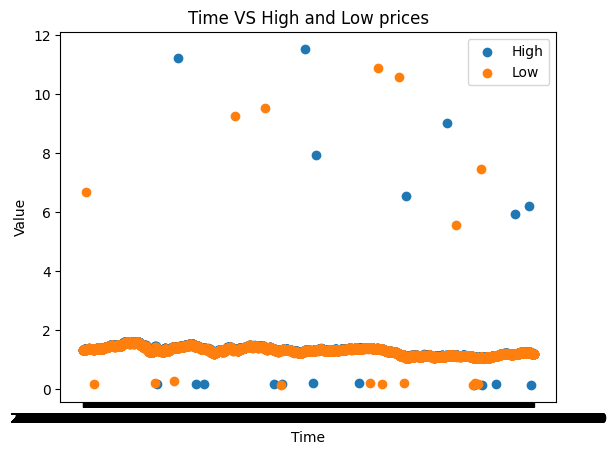

In [15]:
# do a scatter plot between the columns "Time" and "High" 
plt.scatter(train["Time"], train["High"]), plt.scatter(train["Time"], train["Low"])
# incorporate the labels and title and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time VS High and Low prices")
plt.legend(["High", "Low"])

Having chosen the third option for the columns ***Open*** and ***Close***, we will iterate over every row in the DataFrame, and for any row with a null value in the column, it will look at the previous 10 days values, ignore any null values, and calculate the average variation. It will then fill in the null value with the previous day's "Open" and "Close" value plus the average variation.

In [16]:
''' 
Function to fill especifically the null values of the columns "Open" and "Close" by calcultaing the average variation of the previous 10 days 
and adding it to the previous day value of the column
'''
def fill_na_with_variation(df, column):
    for i in range(10, len(df)):
        if pd.isna(df.loc[i, column]): # check if the value is null
            previous = df.loc[i-10:i-1, column] # get the previous 10 values
            previous_not_null = previous[~previous.isnull()] # get the previous values that are not null
            if not previous_not_null.empty: # check if there are previous values that are not null
                avg_variation = (previous_not_null.diff().mean(skipna=True)) # calculate the average variation
                df.loc[i, column] = df.loc[i-1, column] + avg_variation # fill the null value with the previous value plus the average variation
            else: # if the previous 10 days has also null values
                df.loc[i, column] = df.loc[i-1, column] # fill the null value with the previous value
    return df

In [17]:
train_cleaned = fill_na_with_variation(train, "Open")
train_cleaned = fill_na_with_variation(train_cleaned, "Close")

In [18]:
train_cleaned.isnull().sum()

train_idx     0
Time          0
Open          0
High         56
Low          67
Close         0
Volume       28
label         0
dtype: int64

As we mentioned above for the ***High*** and ***Low*** columns we will use the Bayesian method.

In [19]:
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer

# Select the columns to fill null values in
cols_to_impute = ['High', 'Low', "Volume"]

# Create a Bayesian Ridge model and a SimpleImputer instance
model = BayesianRidge()
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(train_cleaned[cols_to_impute])

# Transform the training data to fill null values
train_cleaned[cols_to_impute] = imputer.transform(train_cleaned[cols_to_impute])

In [20]:
train_cleaned.isnull().sum()

train_idx    0
Time         0
Open         0
High         0
Low          0
Close        0
Volume       0
label        0
dtype: int64

The **test** train_cleaned does not have null values

In [21]:
test_source.isnull().sum()

test_idx    0
Time        0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

# OUTLIERS

In [22]:
# miramos si los datos tiene valores atípicos con gráficos
train_cleaned

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1
...,...,...,...,...,...,...,...,...
3504,3504,2018-05-18 00:00:00,1.18053,1.18221,1.17498,1.17689,220609.0,1
3505,3505,2018-05-20 00:00:00,1.17684,1.17756,1.17441,1.17474,18855.0,0
3506,3506,2018-05-21 00:00:00,1.17473,1.17973,1.17165,1.17913,227861.0,0
3507,3507,2018-05-22 00:00:00,1.17914,1.18296,1.17567,1.17824,255729.0,0


In [23]:
train_cleaned.dtypes

train_idx      int64
Time          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
label          int64
dtype: object

In [24]:
# Set the type of the column "Time" to datetime
train_cleaned['Time'] = pd.to_datetime(train_cleaned['Time'])

We'll start looking at our data using plotly charts. Since we are working with time series with open, high, low, close and volume values, we will use candlestick charts.

In [25]:
import plotly.express as px
import plotly.graph_objects as go

In [26]:
fig = go.Figure(data=[go.Candlestick(x=train_cleaned['Time'],
                open=train_cleaned['Open'],
                high=train_cleaned['High'],
                low=train_cleaned['Low'],
                close=train_cleaned['Close'])])

fig.show()

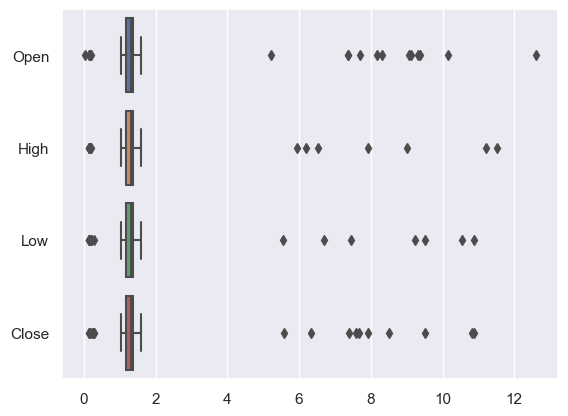

In [27]:
# horizontal boxplot of open, high, low and close prices
sns.set_theme(style="darkgrid")
sns.boxplot(data=train_cleaned[["Open", "High", "Low", "Close"]], orient="h");

We can observe extreme values in the data, which are outliers. We will try different methods to deal with them.<br>
We also have 'impossible' values such as close values lower than the low value, or high values lower than the low value (Jul 10 2014).<br>
We will try to deal with them too.

## IQR method
First, we'll use the IQR method to detect and remove the outliers. The IQR method is a technique used to detect outliers that uses the interquartile range (IQR) to determine outliers based on a lower bound (first quartile - 1.5 * IQR) and an upper bound (third quartile + 1.5 * IQR). Any data points outside of these bounds are considered outliers and are removed from the dataset.

In [28]:
# Calculate the first and third quartile
Q1 = train_cleaned.quantile(0.25)
Q3 = train_cleaned.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Filter out the outliers
train_cleaned_iqr = train_cleaned[~((train_cleaned < (Q1 - 1.5 * IQR)) |(train_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
fig_iqr = go.Figure(data=[go.Candlestick(x=train_cleaned_iqr['Time'],
                open=train_cleaned_iqr['Open'],
                high=train_cleaned_iqr['High'],
                low=train_cleaned_iqr['Low'],
                close=train_cleaned_iqr['Close'])])

# save the plot as a png
fig_iqr.write_image("images/plots/candlestick_iqr.png")

fig_iqr.show()

## Tukey's method
Tukey's method is a technique used to detect outliers that uses the interquartile range (IQR) to determine outliers based on a lower bound (first quartile - 3 * IQR) and an upper bound (third quartile + 3 * IQR). Any data points outside of these bounds are considered outliers and are removed from the dataset.

The Tukey method is a statistical technique for detecting and removing outliers based on the quartiles and the interquartile range of the data. The quartiles are the values that divide the data into four equal parts: the first quartile (Q1) is the median of the lower half of the data, the second quartile (Q2) is the median of the whole data, and the third quartile (Q3) is the median of the upper half of the data. The interquartile range (IQR) is the difference between Q3 and Q1. The Tukey method defines an outlier as a value that is either below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (Source 1 & 2).

In Python, you can use the scipy library to apply the Tukey method for outlier detection. The function stats.mstats.hdquantiles calculates the high-density quantiles of the data, which are similar to the quartiles but more robust to outliers (Source 3). The function takes as parameters the data, a list of probabilities, and an axis.

[Source 1](https://stats.stackexchange.com/questions/547801/tukeys-fences-for-outlier-removal)<br>
[Source 2](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder)<br>
[Source 3](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755)<br>

In [31]:
import scipy.stats as stats
# Load the data in a DataFrame
df = train_cleaned_iqr.copy()
# Select only the open, close, high and low columns
df_ohlc = df[["Open", "High", "Low", "Close"]]
# Apply the Tukey method for outlier detection
outliers = stats.mstats.hdquantiles(df_ohlc.values, prob=[0.025, 0.975], axis=0)
# Filter out the outliers
df_ohlc = df_ohlc[(df_ohlc.values > outliers[0]) & (df_ohlc.values < outliers[1])]
# Merge the filtered data with the original data
df = df.merge(df_ohlc, how="inner")

In [32]:
fig_tukey = go.Figure(data=[go.Candlestick(x=df['Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# save the plot as a png file
fig_tukey.write_image("images/plots/fig_tukey.png")

fig_tukey.show()

### Comparison

In [33]:
# Import libraries
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Load images
img_iqr = Image.open("images/plots/candlestick_iqr.png")
img_tukey = Image.open("images/plots/fig_tukey.png")

# Define a function to overlay two images and change the opacity
def overlay_images(alpha):
    # Create a new image with the same size and mode as img_iqr
    result = Image.new(img_iqr.mode, img_iqr.size)
    # Blend img_iqr and img_tukey using alpha value
    result = Image.blend(img_iqr, img_tukey, alpha)
    # Display the result
    display(result)

# Create a slider widget to control alpha value
slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5)
# Use interact function to link slider and overlay function
widgets.interact(overlay_images, alpha=slider);


interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.01), Output()), _dom_classes…

<function __main__.overlay_images(alpha)>

### Other alternatives to deleting the null values
Los valores atípicos son aquellos que se alejan mucho del resto de los datos y pueden afectar al análisis estadístico. Hay varias formas de tratar con los valores atípicos, dependiendo de la causa y el objetivo de tu estudio. Algunas opciones son:

- Verificar que el valor atípico no sea un error de entrada de datos y corregirlo si es necesario¹.
- Eliminar el valor atípico si no es relevante o representa una anomalía que no te interesa¹².
- Asignar un nuevo valor al valor atípico, por ejemplo, la media o la mediana de los datos¹.
- Utilizar métodos estadísticos, basados en distancia, en densidad o en agrupamientos para detectar y tratar los valores atípicos³⁴⁵.
- Utilizar el método Z-Score para identificar y eliminar los valores que se desvían más de un cierto número de desviaciones estándar de la media⁶.

Espero que esta información te sea útil. ¿Tienes alguna otra pregunta sobre el reto o los datos?

(1) Cómo encontrar fácilmente valores atípicos en Excel - Statologos. https://bing.com/search?q=c%c3%b3mo+tratar+valores+at%c3%adpicos+en+datos Con acceso 7/5/2023.<br>
(2) Valores atípicos (outliers): qué son, ejemplos, calculadora,.... https://www.probabilidadyestadistica.net/valores-atipicos-outliers/ Con acceso 7/5/2023.<br>
(3) 12.6 Valores atípicos - Introducción a la estadística | OpenStax. https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/12-6-valores-atipicos Con acceso 7/5/2023.<br>
(4) Detección y tratamiento de valores atípicos: una guía para principiantes. https://ichi.pro/es/deteccion-y-tratamiento-de-valores-atipicos-una-guia-para-principiantes-215826140075860 Con acceso 7/5/2023.<br>
(5) Valores atípicos en los datos, ¿cómo identificarlos y mane jarlos?. https://www.jstor.org/stable/26937051 Con acceso 7/5/2023.<br>
(6) Tratar con valores atípicos utilizando el método Z-Score. https://www.zephyrnet.com/es/tratar-con-valores-at%C3%ADpicos-utilizando-el-m%C3%A9todo-de-puntuaci%C3%B3n-z/ Con acceso 7/5/2023.<br>

# REFERENCES

* [What is Look-ahead Bias?](https://corporatefinanceinstitute.com/resources/capital-markets/look-ahead-bias/#:~:text=What%20is%20Look%2Dahead%20Bias,from%20a%20study%20or%20simulation.)
* [Interpolation calculation made ez](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf)
* [Forward Filtering Backwards Sampling (FFBS) and Look-Ahead Bias](https://stats.stackexchange.com/questions/110944/forward-filtering-backwards-sampling-ffbs-and-look-ahead-bias)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Tradeoff](https://arxiv.org/abs/2102.12736)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Trade](https://www.madrasresearch.org/post/time-series-imputation-with-wasserstein-interpolation-for-optimal-look-ahead-bias-and-variance-trade)